# Data Mining HW3 Liam Sweeney

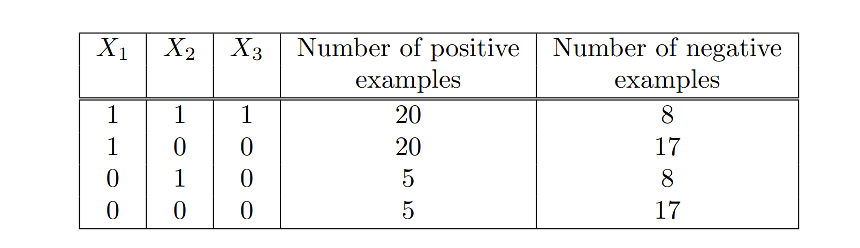

Q: Compute the class conditional probabilities P(X1 = 1|+), P(X1 = 1|−), P(X2 = 1|+), P(X2 = 1|−), P(X3 = 1|+), and P(X3 = 1|−).

A: 
40/25 = 1.6
25/40 = .625
25/16 = 1.56
16/25 = .64
20/8 = 2.5
8/20 = .4

Q: 
Use the class conditional probabilities given in the previous question to predict the class label of each example with the feature set given in the training set above. Use your results to compute the training error rate of the naïve Bayes classifier.

A:P+ = 50/100, P- = 50/100
(.5 * 1.6)/p(x) = .8
...
.3125
.78
.32
1.25
.2


2.	An e-commerce company has launched an online marketing campaign using banner advertisements placed on various third-party web sites to drive visitors to the company’s web site. The web site has received 50,000 hits since the campaign was launched, out of which 10,000 of them were the result of click-throughs of the banner advertisement. Furthermore, 20% of the visitors directed to the Web site via the banner advertisement bought an item at the web site (compared to only 6% of the visitors arriving at the web site without clicking on a banner advertisement who ended up buying an item. 

Determine whether the advertisement campaign is successful. To do this, you need to check the following: among the visitors who made a purchase at the web site, are they more likely to arrive at the web site via the banner advertisement or arrive without clicking on the banner?

HINT: P(Ad|Buy) will give the probability that given a Buy, the Buy came as a result of an Ad. You need to compare P(Ad|Buy) with P(noAd|Buy)


50000 hits, 10000 bact, .2 of which bought item, compared to .06 buying otherwise.

2000 bought from ad, while 40k * .06 = 2.4k bought otherwise. So total buy is 4.4k. 
P(Ad|Buy) = P(2000|4,400) = .454, P(noAd|Buy) = P(2,400|4,400) = .54

3.	We covered a number of different learners in class. Discuss the pros and cons of whichever one or two you wish to choose. Which is robust in the presence of noise? Which is robust in the presence of duplicate attributes, when the decision boundary is non-linear, when there are irrelevant attributes, when attributes are dependent on each other? (Note: Feel free to use ChatGPT as a starting point for your answers, but make sure to check the response carefully, modify it,  change the prompt etc., so that it answers the question properly and you understand the answer!)

From Chat GPT: 

There is no single learning algorithm that is universally robust to all types of noise or data issues. Different algorithms may perform better or worse depending on the specific nature of the data and the type of noise or issue present.

However, some algorithms may be more suitable for certain types of noise or data issues. For example:

Robust to noise: Decision trees and Random forests are known to be robust to noisy data because they can handle irrelevant attributes and outliers.

Robust to duplicate attributes: Decision trees and Naive Bayes are known to be robust to duplicate attributes because they do not rely on the correlation between attributes.

Non-linear decision boundaries: Support Vector Machines (SVM) and Neural Networks are powerful algorithms that can model non-linear decision boundaries.

Irrelevant attributes: Feature selection techniques like Recursive Feature Elimination (RFE) or Principal Component Analysis (PCA) can help to identify and remove irrelevant attributes.

Dependent attributes: Bayesian Networks can handle dependent attributes by modeling the conditional dependencies between them.

It's important to note that the choice of algorithm also depends on the specific problem and the available data. It's often necessary to try out multiple algorithms and compare their performance on the specific dataset to determine which one is most suitable for the task at hand.

4.	Let us explore the learners we covered. Attach your notebook to BB.

Text messages can be classified as either spam/not spam. An example data set can be found in BB in the same folder as this homework (downloaded from Kaggle). We want to express our data as tfidf (total frequency of each word multiplied by the log of inverse document frequency). 

a.	We can do this by executing the following code (the dataframe is named texts):

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
words = tfidf_vectorizer.fit_transform(texts['Message'])
words = pd.DataFrame(words.toarray(),columns = tfidf_vectorizer.get_feature_names())


Should we transform our full set of data into tfidf and then divide the data into a train and test set, or should we divide our data first and then fit? Why?


b.	Using a train/test split of 70/30 and the TfidfVectorizer for the attributes: Run a nearest neighbor (from sklearn.neighbors import KNeighborsClassifier). You can see this in tutorial 6 from your book. 
Record how you decided  on the parameter k? (You can try it with multiple k values and choose the best one!) Look at tutorial 6 for this too!


c.	Using the same train/test split as b. above run a Bayesian classifier (from sklearn.naive_bayes import MultinomialNB)



d.	For each of the models (part ii and iii)  record your precision, recall, f1 score and any other measure that you want to look at. 

from sklearn import metrics (Then you can use metrics. confusion_matrix, metrics.classification_report and other methods in metrics)

e.	For this particular problem, which measure(s) from part d is most useful? Why?

f.	This may take time! Do part b above (only one model, whichever you choose) with cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/liamsweeney/Downloads/spamTextmessages.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
X = df['Message']
y = df['Category']

In [5]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
y_test.head()

3245    ham
944     ham
1044    ham
2484    ham
812     ham
Name: Category, dtype: object

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vectorizer = TfidfVectorizer() 
X_train = tfidf_vectorizer.fit_transform(X_train) 
X_train = pd.DataFrame(X_train.toarray(),columns = tfidf_vectorizer.get_feature_names())

/Users/liamsweeney/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
X_train.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,02,0207,...,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
X_test = tfidf_vectorizer.transform(X_test) 
X_test = pd.DataFrame(X_test.toarray(),columns = tfidf_vectorizer.get_feature_names())

/Users/liamsweeney/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
X_train.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,02,0207,...,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X_test.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,02,0207,...,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Q: Should we transform our full set of data into tfidf and then divide the data into a train and test set, or should we divide our data first and then fit? Why?

A: I think we should divide and then transform, becuase tfidf measures the frequency of a word in a document compared to in a corpus. In order to get an accurrate prediction, we should split first so that tfidf measures frequency out the its own corupus rather than a larger one. For example, if we split 70 30, tfidf should be measured separately for 70 and 30. If measured over 100, frequency measurements will be off. 

In [16]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

In [17]:
clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
accuracy_score(y_train, Y_predTrain)
accuracy_score(y_test, Y_predTest)

0.9078947368421053

In [18]:
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

In [22]:
for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))

In [26]:
print(testAcc)

[0.9078947368421053, 0.9078947368421053, 0.9078947368421053, 0.9078947368421053, 0.9078947368421053, 0.9078947368421053, 0.9078947368421053]


5.	Here is a second data set that you should explore. For this homework
https://www.dropbox.com/sh/184pivd3v41s2cc/AADnWAdrQjBdKG89kPQJ7vJQa?dl=0

movies.csv: CSV that has all 22,600 movies with their title, description, etc.
first5000movies.csv: Just the first 5,000 movies
movies.csv was formed from combining the four datasets below and merging duplicates.
https://www.kaggle.com/datasets/shivamb/netflix-shows
https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows
https://www.kaggle.com/datasets/shivamb/hulu-movies-and-tv-shows
https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows

a.	Read: https://www.turing.com/kb/content-based-filtering-in-recommender-systems

b.	Read in the data and explore it, post your notebook – no ML model needed for this stage, just data exploration. You may use the smaller file (5000) movies. Read the file into a dataframe and record what you explored. Number of rows, number of columns, list the colums, possible values of those columns that only have a few values, etc. We will use this in a later lab, but I want you to be very comfortable with it at that time.


In [28]:
import pandas as pd

In [29]:
movies = pd.read_csv("/Users/liamsweeney/Downloads/first5000movies(2).csv")

In [30]:
movies.head()

,title,release_year,type,director,cast,onPrime,onDisney,onHulu,onNetflix,rating,duration,listed_in,description
0,"""The Paramedic Angel""",2021,TV Show,NaN,"Nate Reidnauer, Nikki Hrichak, Nina Randazzo, ...",1,0,0,0,ALL,1 Season,Drama,The tragedy of a loving family man and paramed...
1,#Alive,2020,Movie,Cho Il,"Yoo Ah-in, Park Shin-hye",0,0,0,1,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ..."
2,#AnneFrank - Parallel Stories,2019,Movie,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",0,0,0,1,TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol..."
3,#FriendButMarried,2018,Movie,Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",0,0,0,1,TV-G,102 min,"Dramas, International Movies, Romantic Movies","Pining for his high school crush for years, a ..."
4,#FriendButMarried 2,2020,Movie,Rako Prijanto,"Adipati Dolken, Mawar de Jongh, Sari Nila, Von...",0,0,0,1,TV-G,104 min,"Dramas, International Movies, Romantic Movies",As Ayu and Ditto finally transition from best ...


In [31]:
movies.describe()

,release_year,onPrime,onDisney,onHulu,onNetflix
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2011.631926,0.452891,0.043809,0.143829,0.378476
std,14.413745,0.497826,0.204690,0.350951,0.485056
min,1927.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,1.000000,0.000000,0.000000,1.000000
max,2021.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         4999 non-null   object
 1   release_year  4999 non-null   int64 
 2   type          4999 non-null   object
 3   director      3201 non-null   object
 4   cast          3845 non-null   object
 5   onPrime       4999 non-null   int64 
 6   onDisney      4999 non-null   int64 
 7   onHulu        4999 non-null   int64 
 8   onNetflix     4999 non-null   int64 
 9   rating        4805 non-null   object
 10  duration      4893 non-null   object
 11  listed_in     4999 non-null   object
 12  description   4998 non-null   object
dtypes: int64(5), object(8)
memory usage: 507.8+ KB


In [34]:
movies.columns

Index(['title', 'release_year', 'type', 'director', 'cast', 'onPrime',
       'onDisney', 'onHulu', 'onNetflix', 'rating', 'duration', 'listed_in',
       'description'],
      dtype='object')